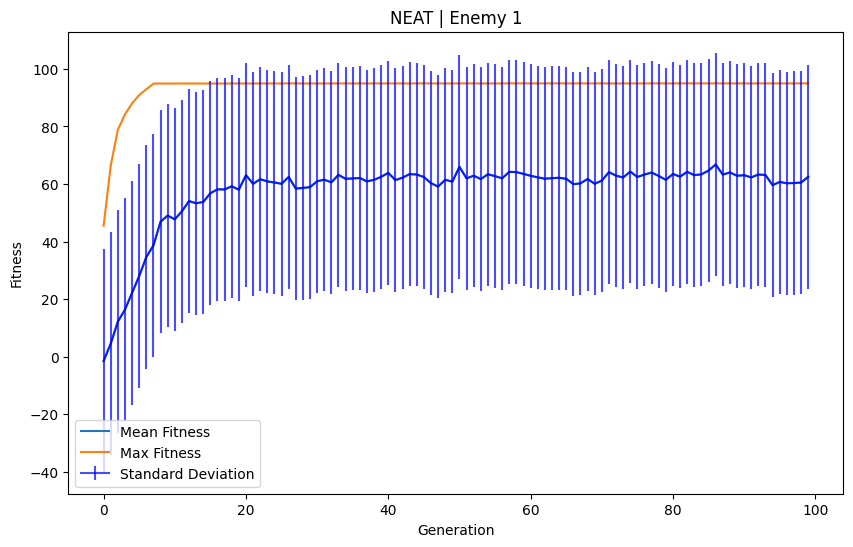

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define a function to read and process a single CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path)
    return df

# Define a function to aggregate data across all CSV files
def aggregate_data(file_paths):
    dfs = [process_csv(file) for file in file_paths]
    combined_df = pd.concat(dfs)
    aggregated_df = combined_df.groupby('generation').agg({
        'max_fitness': 'mean',
        'mean_fitness': 'mean',
        'stdev_fitness': 'mean'
    }).reset_index()
    return aggregated_df

# List of file paths (replace with your actual file paths)
base_path = "../neat-controller/stats/"

enemy_number = 1
run_numbers = range(10)  # Assuming run numbers range from 0 to 9

file_paths = []

for run_num in run_numbers:
    file_name = f"stats-{enemy_number}-{run_num}.csv"
    file_path = os.path.join(base_path, file_name)
    file_paths.append(file_path)

# Aggregate the data
aggregated_data = aggregate_data(file_paths)

# Calculate average mean and maximum values
avg_mean_fitness = aggregated_data['mean_fitness'].mean()
avg_max_fitness = aggregated_data['max_fitness'].mean()
avg_stdev_fitness = aggregated_data['stdev_fitness'].mean()

# Plotting
plt.figure(figsize=(10, 6))
# Plot the average mean fitness
plt.plot(aggregated_data['generation'], aggregated_data['mean_fitness'], label='Mean Fitness')
plt.plot(aggregated_data['generation'], aggregated_data['max_fitness'], label='Max Fitness')

# Add error bars for standard deviation
plt.errorbar(aggregated_data['generation'], aggregated_data['mean_fitness'], yerr=avg_stdev_fitness, color='blue', alpha=0.7, label='Standard Deviation')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('NEAT | Enemy 1')
plt.legend()
plt.show()

# print(f"Average Mean Fitness across all generations: {avg_mean_fitness}")
# print(f"Average Max Fitness across all generations: {avg_max_fitness}")
